# Using GAMA for Automated Machine Learning
This notebook is used at the Tutorial on Automated Machine Learning at ODSC Europe 2019.
It shows how to use GAMA for automated machine learning.
Most of the information in this notebook can also be found in the [documentation](https://pgijsbers.github.io/gama/).
If you are reading this notebook at a later time, and find its outdated, be sure to check out the documentation instead.

## Installing GAMA
GAMA is hosted on PyPI, so installing it is easy:
```bash
> pip install gama
```

This installs the Python GAMA package. If you want to make use of the GAMA Dashboard (discussed at the end of this notebook), you should install its visualization dependencies as well:

```bash
> pip install gama[viz]
```

## Using GAMA in Python
Using GAMA through its Python API works much like you would a scikit-learn estimator:

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from gama import GamaClassifier

x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

automl = GamaClassifier(max_total_time=180)
automl.fit(x_train, y_train)
automl.score(x_test, y_test)

## Configuring the AutoML Pipeline

## Using GAMA through CLI or with a User Interface
Alongside its Python interface, GAMA also has a Command Line Interface (CLI) and a Graphical User Interface (GUI).
These are still new and experimental.
Expect to see changes, but don't be afraid to try it out yourself and let us know what you think! :)

To start the GUI interface, call:
```bash
> gama -ui
```

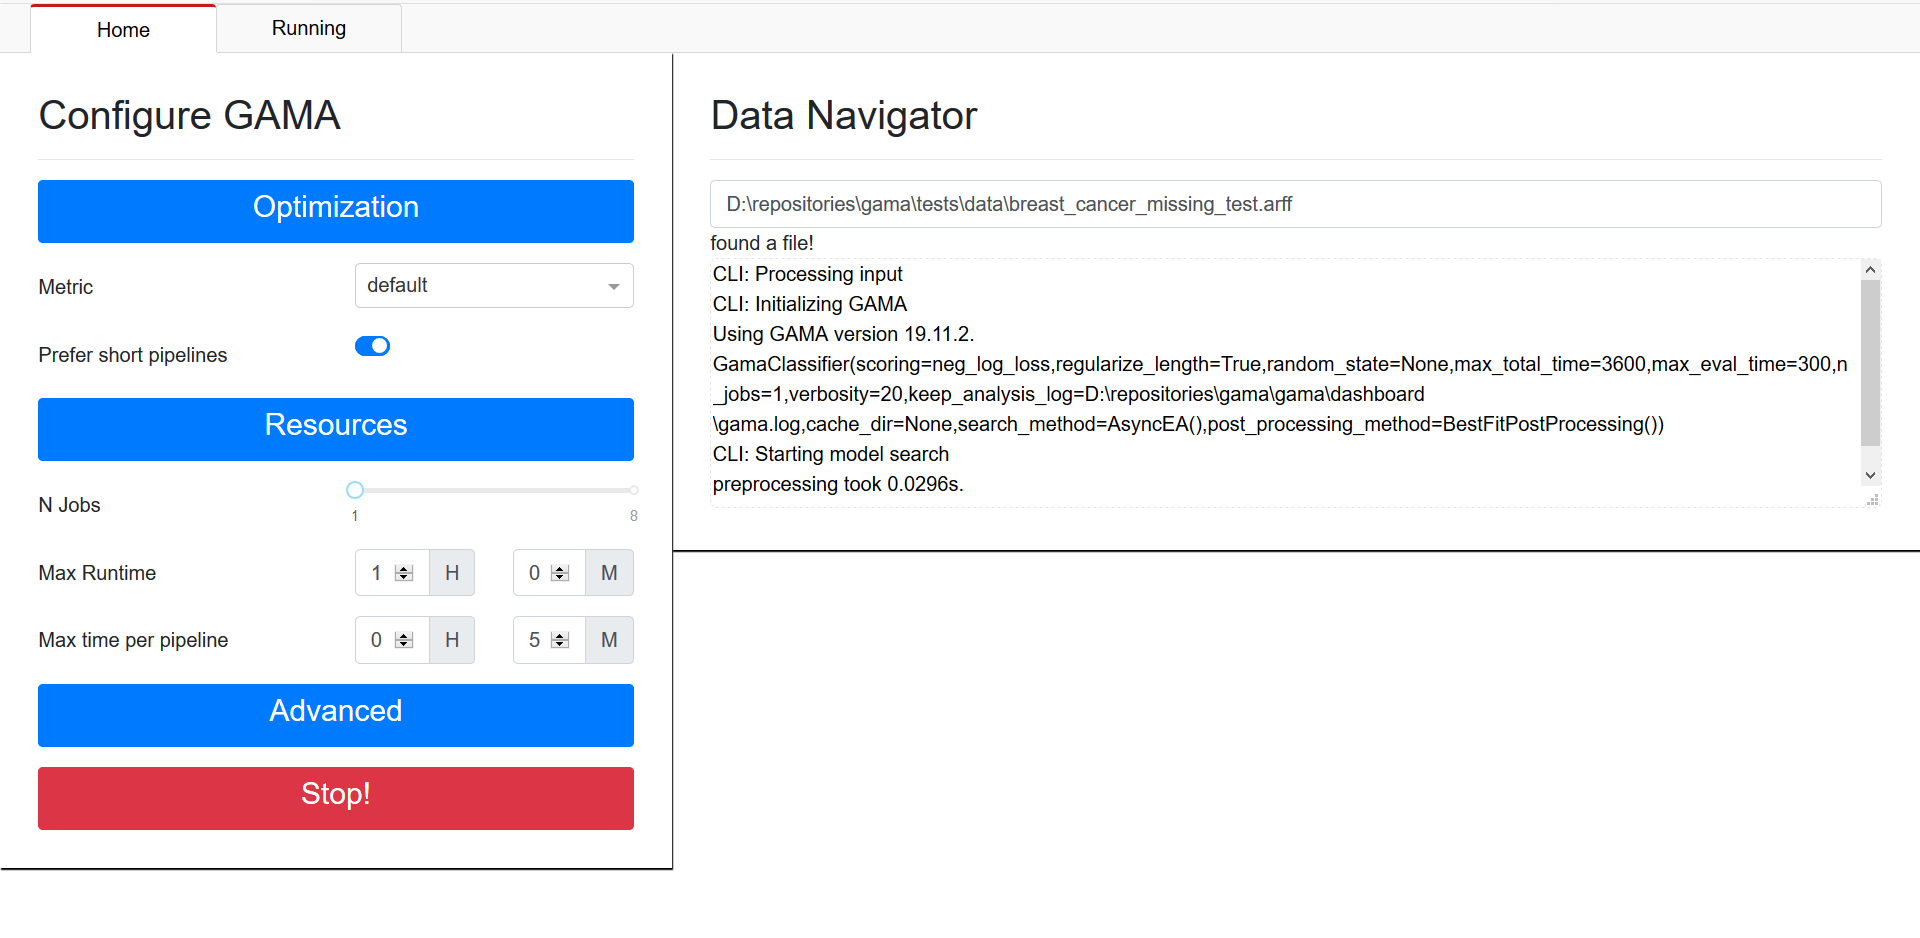

The command line interface has many options, calling it to solve iris could look like:
```bash
> gama ~/data/iris.arff -t 60 -n 4 -m 'log_loss'
```
For a full list of possible arguments, see
```bash
> gama -h
```

```bash
>gama -h
usage: gama [-h] [--target TARGET] [-o OUTPUT_FILE] [--mode MODE] [-m METRIC]
            [--long] [-t TIME_LIMIT_M] [--time_pipeline MAX_EVAL_TIME_M]
            [-n N_JOBS] [-v]
            input_file

An AutoML tool that optimizes machine learning pipelines for your data.

positional arguments:
  input_file            An ARFF file with the data to optimize a model for.

optional arguments:
  -h, --help            show this help message and exit
  -v                    Report status updates to console.

File I/O:
  --target TARGET       The target column in the input file.
  -o OUTPUT_FILE        Path to store the final model in.
                        (default=gama_model.pkl)

Optimization:
  --mode MODE           By default, it is determined automatically from the
                        input file.Use this parameter force 'classification'
                        or 'regression' mode.
  -m METRIC             The metric to optimize the model for. Default is log
                        loss for classification and RMSE for regression.
  --long                By default GAMA will guide search towards shorter
                        pipelines. Set this flag to disable the feature.

Resources:
  -t TIME_LIMIT_M       The maximum time (in minutes) GAMA has for
                        optimization. (default=60)
  --time_pipeline MAX_EVAL_TIME_M
                        The maximum time (in minutes) GAMA may spend one a
                        single pipeline evaluation. (default=5)
  -n N_JOBS             The number of jobs to run in parallel for pipeline
                        evaluations. (default=1)
```                        